In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# 데이터 불러오기
df = pd.read_csv("C:\\Users\\axhtl\\OneDrive\\바탕 화면\\학교\\인공지능개론\\diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [2]:
# 컬럼명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
# 레이블 갯수 확인(숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

# 범주형 컬럼 자동 탐지
categorical_cols = df.select_dtypes(include=['object']).columns

# One-Hot Encoding 적용
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df_encoded

In [5]:
# 데이터 확인
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [6]:
X = df.drop('Outcome', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [7]:
y = df['Outcome']
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

In [8]:
X = df.drop('Outcome', axis=1).values

In [9]:
y = y.values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

In [12]:
import torch

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [13]:
from torch.utils.data import TensorDataset, DataLoader

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([614, 7]),
 torch.Size([154, 7]),
 torch.Size([614]),
 torch.Size([154]))

# 모델 정의

In [15]:
import torch.nn as nn
import torch.optim as optim

class CarEvaluationDense(nn.Module):
    def __init__(self):
        super(CarEvaluationDense, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 4)  # 4 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = CarEvaluationDense()

# 손실 함수 및 최적화 기법 정의

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습

In [17]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 1.6005, Accuracy: 61.04%
Epoch 2/20, Loss: 0.6881, Accuracy: 60.39%
Epoch 3/20, Loss: 0.6327, Accuracy: 62.99%
Epoch 4/20, Loss: 0.6597, Accuracy: 67.53%
Epoch 5/20, Loss: 0.6227, Accuracy: 71.43%
Epoch 6/20, Loss: 0.6004, Accuracy: 71.43%
Epoch 7/20, Loss: 0.6021, Accuracy: 66.88%
Epoch 8/20, Loss: 0.5974, Accuracy: 70.13%
Epoch 9/20, Loss: 0.6101, Accuracy: 70.78%
Epoch 10/20, Loss: 0.5837, Accuracy: 74.03%
Epoch 11/20, Loss: 0.5735, Accuracy: 59.09%
Epoch 12/20, Loss: 0.6324, Accuracy: 65.58%
Epoch 13/20, Loss: 0.5752, Accuracy: 73.38%
Epoch 14/20, Loss: 0.5963, Accuracy: 68.83%
Epoch 15/20, Loss: 0.5672, Accuracy: 70.78%
Epoch 16/20, Loss: 0.5540, Accuracy: 72.73%
Epoch 17/20, Loss: 0.5953, Accuracy: 74.03%
Epoch 18/20, Loss: 0.5722, Accuracy: 72.08%
Epoch 19/20, Loss: 0.6072, Accuracy: 64.94%
Epoch 20/20, Loss: 0.6229, Accuracy: 72.08%
Training complete.


# 모델 평가

In [18]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[99  8]
 [35 12]]
F1 Score: 0.68
Precision: 0.70
Recall: 0.72
Specificity: 0.59


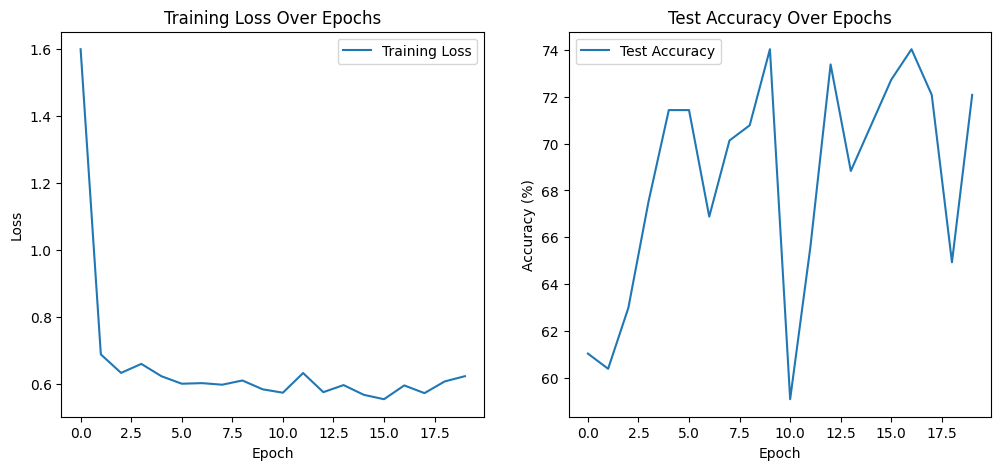

In [19]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()